In [6]:
!pip install tensorflow_datasets >> None

  You can safely remove it manually.


In [225]:
import numpy as np
from tensorflow import keras

In [226]:
from keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [153]:
print(train_data.shape)
print(len(train_labels))
print(train_labels)
print(test_data.shape)
print(len(test_labels))

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000


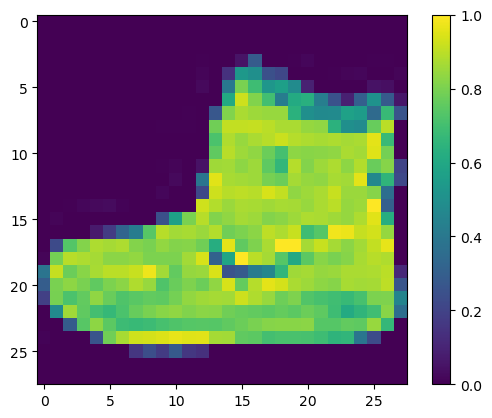

In [231]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(train_data[0])
plt.colorbar()

plt.show()

In [227]:
# Now we have our data values from 0 to 1
train_data = train_data / 255.0

test_data = test_data / 255.0

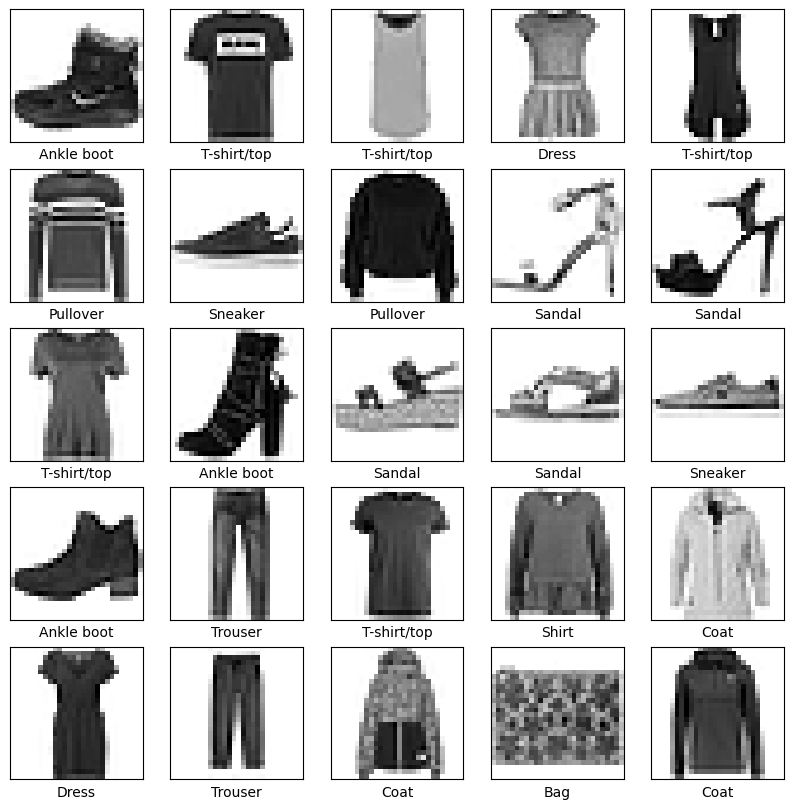

In [156]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Let's expirement with the Neural Network params

### First let's see how many layers and neurons do we need

In [157]:
# Basic 3 neruon model
base_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])



In [158]:
more_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [159]:
# At this moment I'll use the "adam" optimizer for both models
base_model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

more_model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [160]:
# Let's train our models

print("base_model")
print("-----")
base_model.fit(train_data, train_labels, batch_size=1024, epochs=10)
print("-----")
print("more_model")
print("-----")
more_model.fit(train_data, train_labels, batch_size=1024, epochs=10)

base_model
-----
Epoch 1/10
59/59 [==============================] - 1s 3ms/step - loss: 0.8388 - accuracy: 0.7240
Epoch 2/10
59/59 [==============================] - 0s 3ms/step - loss: 0.5046 - accuracy: 0.8274
Epoch 3/10
59/59 [==============================] - 0s 4ms/step - loss: 0.4512 - accuracy: 0.8458
Epoch 4/10
59/59 [==============================] - 0s 4ms/step - loss: 0.4217 - accuracy: 0.8553
Epoch 5/10
59/59 [==============================] - 0s 3ms/step - loss: 0.4004 - accuracy: 0.8613
Epoch 6/10
59/59 [==============================] - 0s 4ms/step - loss: 0.3843 - accuracy: 0.8665
Epoch 7/10
59/59 [==============================] - 0s 4ms/step - loss: 0.3690 - accuracy: 0.8708
Epoch 8/10
59/59 [==============================] - 0s 4ms/step - loss: 0.3628 - accuracy: 0.8732
Epoch 9/10
59/59 [==============================] - 0s 4ms/step - loss: 0.3540 - accuracy: 0.8753
Epoch 10/10
59/59 [==============================] - 0s 4ms/step - loss: 0.3416 - accuracy: 0.8791
--

In [161]:
test_loss_base, test_acc_base = base_model.evaluate(test_data, test_labels, verbose=2)

test_loss_more, test_acc_more = more_model.evaluate(test_data, test_labels, verbose=2)

print('\nTest accuracy for base:', test_acc_base)

print('\nTest accuracy for more:', test_acc_more)

313/313 - 0s - loss: 0.3823 - accuracy: 0.8660 - 295ms/epoch - 943us/step
313/313 - 0s - loss: 0.3553 - accuracy: 0.8756 - 313ms/epoch - 1000us/step

Test accuracy for base: 0.8659999966621399

Test accuracy for more: 0.8755999803543091


### As we can see even at 10 epochs loss and accuracy is better on the NN with more layers

In [162]:
# Let's expirement with neurons
base_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)    
])

more_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10)
])

less_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10)
])

In [163]:
base_model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

more_model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

less_model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [164]:
print("base_model")
print("-----")
base_model.fit(train_data, train_labels, batch_size=1024, epochs=10)
print("-----")
print("more_model")
print("-----")
more_model.fit(train_data, train_labels, batch_size=1024, epochs=10)
print("-----")
print("base_model")
print("-----")
less_model.fit(train_data, train_labels, batch_size=1024, epochs=10)

base_model
-----
Epoch 1/10
59/59 [==============================] - 1s 5ms/step - loss: 0.8251 - accuracy: 0.7301
Epoch 2/10
59/59 [==============================] - 0s 4ms/step - loss: 0.4688 - accuracy: 0.8366
Epoch 3/10
59/59 [==============================] - 0s 4ms/step - loss: 0.4175 - accuracy: 0.8545
Epoch 4/10
59/59 [==============================] - 0s 4ms/step - loss: 0.3869 - accuracy: 0.8633
Epoch 5/10
59/59 [==============================] - 0s 4ms/step - loss: 0.3684 - accuracy: 0.8692
Epoch 6/10
59/59 [==============================] - 0s 4ms/step - loss: 0.3473 - accuracy: 0.8770
Epoch 7/10
59/59 [==============================] - 0s 4ms/step - loss: 0.3364 - accuracy: 0.8801
Epoch 8/10
59/59 [==============================] - 0s 4ms/step - loss: 0.3313 - accuracy: 0.8825
Epoch 9/10
59/59 [==============================] - 0s 4ms/step - loss: 0.3174 - accuracy: 0.8859
Epoch 10/10
59/59 [==============================] - 0s 4ms/step - loss: 0.3105 - accuracy: 0.8879
--

In [165]:
test_loss_base, test_acc_base = base_model.evaluate(test_data, test_labels, verbose=2)

test_loss_more, test_acc_more = more_model.evaluate(test_data, test_labels, verbose=2)

test_loss_less, test_acc_less = less_model.evaluate(test_data, test_labels, verbose=2)

print('\nTest accuracy for base:', test_acc_base)

print('\nTest accuracy for more:', test_acc_more)

print('\nTest accuracy for less:', test_acc_less)

313/313 - 0s - loss: 0.3551 - accuracy: 0.8744 - 317ms/epoch - 1ms/step
313/313 - 0s - loss: 0.3476 - accuracy: 0.8784 - 352ms/epoch - 1ms/step
313/313 - 0s - loss: 0.3892 - accuracy: 0.8628 - 294ms/epoch - 941us/step

Test accuracy for base: 0.8744000196456909

Test accuracy for more: 0.8784000277519226

Test accuracy for less: 0.8628000020980835


### Model with more neurons has better results, so we'll use it for the next experiments

In [169]:
base_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10)
])

softmax_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='softmax'),
    keras.layers.Dense(256, activation='softmax'),
    keras.layers.Dense(10)
])

tanh_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='tanh'),
    keras.layers.Dense(256, activation='tanh'),
    keras.layers.Dense(10)
])

In [170]:
base_model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

softmax_model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

tanh_model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [171]:
print("base_model")
print("-----")
base_model.fit(train_data, train_labels, batch_size=1024, epochs=10) 
print("-----")
print("softmax_model")
print("-----")
softmax_model.fit(train_data, train_labels, batch_size=1024, epochs=10)
print("-----")
print("tanh_model")
print("-----")
tanh_model.fit(train_data, train_labels, batch_size=1024, epochs=10)

base_model
-----
Epoch 1/10
59/59 [==============================] - 1s 6ms/step - loss: 0.7156 - accuracy: 0.7600
Epoch 2/10
59/59 [==============================] - 0s 7ms/step - loss: 0.4332 - accuracy: 0.8472
Epoch 3/10
59/59 [==============================] - 0s 7ms/step - loss: 0.3907 - accuracy: 0.8614
Epoch 4/10
59/59 [==============================] - 0s 7ms/step - loss: 0.3547 - accuracy: 0.8752
Epoch 5/10
59/59 [==============================] - 0s 7ms/step - loss: 0.3404 - accuracy: 0.8791
Epoch 6/10
59/59 [==============================] - 0s 7ms/step - loss: 0.3162 - accuracy: 0.8869
Epoch 7/10
59/59 [==============================] - 0s 6ms/step - loss: 0.3043 - accuracy: 0.8907
Epoch 8/10
59/59 [==============================] - 0s 6ms/step - loss: 0.2903 - accuracy: 0.8958
Epoch 9/10
59/59 [==============================] - 0s 7ms/step - loss: 0.2791 - accuracy: 0.8980
Epoch 10/10
59/59 [==============================] - 0s 6ms/step - loss: 0.2727 - accuracy: 0.9006
--

In [172]:
test_loss_base, test_acc_base = base_model.evaluate(test_data, test_labels, verbose=2)

test_loss_softmax, test_acc_softmax = softmax_model.evaluate(test_data, test_labels, verbose=2)

test_loss_tanh, test_acc_tanh = tanh_model.evaluate(test_data, test_labels, verbose=2)

print('\nTest accuracy for base:', test_acc_base)

print('\nTest accuracy for softmax:', test_acc_softmax)

print('\nTest accuracy for tanh:', test_acc_tanh)

313/313 - 0s - loss: 0.3366 - accuracy: 0.8822 - 353ms/epoch - 1ms/step
313/313 - 0s - loss: 1.8016 - accuracy: 0.5656 - 408ms/epoch - 1ms/step
313/313 - 0s - loss: 0.3694 - accuracy: 0.8644 - 389ms/epoch - 1ms/step

Test accuracy for base: 0.8822000026702881

Test accuracy for softmax: 0.5655999779701233

Test accuracy for tanh: 0.8644000291824341


### *relu* Shows the best results

### Let's expirements with optimizers

In [173]:
model_adam = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10)
])

model_lion = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10)
])

model_sgd = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10)
])

In [174]:
from keras.optimizers import Lion
model_adam.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_lion.compile(optimizer=Lion(),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_sgd.compile(optimizer='sgd',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [175]:
print("Adam")
print("-----")
model_adam.fit(train_data, train_labels, batch_size=1024, epochs=10) 
print("-----")
print("Lion")
print("-----")
model_lion.fit(train_data, train_labels, batch_size=1024, epochs=10)
print("-----")
print("SGD")
print("-----")
model_sgd.fit(train_data, train_labels, batch_size=1024, epochs=10)

Adam
-----
Epoch 1/10
59/59 [==============================] - 1s 6ms/step - loss: 0.7385 - accuracy: 0.7527
Epoch 2/10
59/59 [==============================] - 0s 7ms/step - loss: 0.4358 - accuracy: 0.8484
Epoch 3/10
59/59 [==============================] - 0s 7ms/step - loss: 0.3891 - accuracy: 0.8624
Epoch 4/10
59/59 [==============================] - 0s 7ms/step - loss: 0.3577 - accuracy: 0.8725
Epoch 5/10
59/59 [==============================] - 0s 7ms/step - loss: 0.3307 - accuracy: 0.8819
Epoch 6/10
59/59 [==============================] - 0s 7ms/step - loss: 0.3175 - accuracy: 0.8858
Epoch 7/10
59/59 [==============================] - 0s 7ms/step - loss: 0.3017 - accuracy: 0.8910
Epoch 8/10
59/59 [==============================] - 0s 6ms/step - loss: 0.2914 - accuracy: 0.8943
Epoch 9/10
59/59 [==============================] - 0s 7ms/step - loss: 0.2825 - accuracy: 0.8968
Epoch 10/10
59/59 [==============================] - 0s 7ms/step - loss: 0.2745 - accuracy: 0.8995
-----
Li

### *adam* shows the best results for our model

### Let's take different batch sizes and epochs

In [176]:
model_base = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10)
])

model_less = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10)
])

model_more = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10)
])

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10)
])

In [177]:
model_base.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_less.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_more.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [178]:
print("base")
print("-----")
model_base.fit(train_data, train_labels, batch_size=1024, epochs=10) 
print("-----")
print("less")
print("-----")
model_less.fit(train_data, train_labels, batch_size=4096, epochs=10)
print("-----")
print("more")
print("-----")
model_more.fit(train_data, train_labels, batch_size=256, epochs=10)
print("-----")
print("default batch_size")
print("-----")
model.fit(train_data, train_labels, epochs=10)

base
-----
Epoch 1/10
59/59 [==============================] - 1s 6ms/step - loss: 0.7170 - accuracy: 0.7614
Epoch 2/10
59/59 [==============================] - 0s 7ms/step - loss: 0.4376 - accuracy: 0.8471
Epoch 3/10
59/59 [==============================] - 0s 7ms/step - loss: 0.3910 - accuracy: 0.8634
Epoch 4/10
59/59 [==============================] - 0s 6ms/step - loss: 0.3565 - accuracy: 0.8734
Epoch 5/10
59/59 [==============================] - 0s 6ms/step - loss: 0.3426 - accuracy: 0.8772
Epoch 6/10
59/59 [==============================] - 0s 6ms/step - loss: 0.3179 - accuracy: 0.8857
Epoch 7/10
59/59 [==============================] - 0s 6ms/step - loss: 0.2985 - accuracy: 0.8928
Epoch 8/10
59/59 [==============================] - 0s 6ms/step - loss: 0.2921 - accuracy: 0.8928
Epoch 9/10
59/59 [==============================] - 0s 6ms/step - loss: 0.2795 - accuracy: 0.8979
Epoch 10/10
59/59 [==============================] - 0s 6ms/step - loss: 0.2708 - accuracy: 0.9017
-----
le

### Accuracy and loss of default batch_size and batch_size=256 almost the same, but with batch_size=256 model trains much faster

In [208]:
model_base = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='tanh'),
    keras.layers.Dense(10)
])

model_more = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10)
])

model_emore = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10)
])

In [209]:
model_base.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_more.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_emore.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [210]:
print("base")
print("-----")
model_base.fit(train_data, train_labels, batch_size=256, epochs=10) 
print("-----")
print("more")
print("-----")
model_more.fit(train_data, train_labels, batch_size=256, epochs=20)
print("-----")
print("even_more")
print("-----")
model_emore.fit(train_data, train_labels, batch_size=256, epochs=40)

base
-----
Epoch 1/10
235/235 [==============================] - 1s 3ms/step - loss: 0.5187 - accuracy: 0.8143
Epoch 2/10
235/235 [==============================] - 1s 3ms/step - loss: 0.3629 - accuracy: 0.8687
Epoch 3/10
235/235 [==============================] - 1s 3ms/step - loss: 0.3275 - accuracy: 0.8787
Epoch 4/10
235/235 [==============================] - 1s 3ms/step - loss: 0.3031 - accuracy: 0.8874
Epoch 5/10
235/235 [==============================] - 1s 3ms/step - loss: 0.2821 - accuracy: 0.8953
Epoch 6/10
235/235 [==============================] - 1s 3ms/step - loss: 0.2658 - accuracy: 0.9014
Epoch 7/10
235/235 [==============================] - 1s 3ms/step - loss: 0.2568 - accuracy: 0.9038
Epoch 8/10
235/235 [==============================] - 1s 3ms/step - loss: 0.2417 - accuracy: 0.9093
Epoch 9/10
235/235 [==============================] - 1s 3ms/step - loss: 0.2346 - accuracy: 0.9123
Epoch 10/10
235/235 [==============================] - 1s 3ms/step - loss: 0.2226 - accur

In [211]:
test_loss_base, test_acc_base = model_base.evaluate(test_data, test_labels, verbose=2)

test_loss_more, test_acc_more = model_more.evaluate(test_data, test_labels, verbose=2)

test_loss_emore, test_acc_emore = model_emore.evaluate(test_data, test_labels, verbose=2)

print('\nTest accuracy for base:', test_acc_base)

print('\nTest accuracy for more:', test_acc_more)

print('\nTest accuracy for even more:', test_acc_emore)

313/313 - 0s - loss: 0.3313 - accuracy: 0.8835 - 366ms/epoch - 1ms/step
313/313 - 0s - loss: 0.3519 - accuracy: 0.8851 - 363ms/epoch - 1ms/step
313/313 - 0s - loss: 0.4578 - accuracy: 0.8927 - 352ms/epoch - 1ms/step

Test accuracy for base: 0.8834999799728394

Test accuracy for more: 0.8851000070571899

Test accuracy for even more: 0.8927000164985657


## As we can see model with epochs = 40 shows better accuracy, but our loss is already increasing, so we need to be very carefull

### Let's try to use regularizer

In [212]:
model_base = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10)
])

model_regularized = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    keras.layers.Dense(10)
])


In [213]:
model_base.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model_regularized.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [214]:
print("base")
print("-----")
model_base.fit(train_data, train_labels, batch_size=256, epochs=20) 
print("-----")
print("more")
print("-----")
model_regularized.fit(train_data, train_labels, batch_size=256, epochs=20)

base
-----
Epoch 1/20
235/235 [==============================] - 1s 3ms/step - loss: 0.5515 - accuracy: 0.8087
Epoch 2/20
235/235 [==============================] - 1s 3ms/step - loss: 0.3788 - accuracy: 0.8646
Epoch 3/20
235/235 [==============================] - 1s 3ms/step - loss: 0.3330 - accuracy: 0.8795
Epoch 4/20
235/235 [==============================] - 1s 3ms/step - loss: 0.3091 - accuracy: 0.8874
Epoch 5/20
235/235 [==============================] - 1s 4ms/step - loss: 0.2896 - accuracy: 0.8935
Epoch 6/20
235/235 [==============================] - 1s 3ms/step - loss: 0.2719 - accuracy: 0.8995
Epoch 7/20
235/235 [==============================] - 1s 4ms/step - loss: 0.2590 - accuracy: 0.9042
Epoch 8/20
235/235 [==============================] - 1s 3ms/step - loss: 0.2492 - accuracy: 0.9079
Epoch 9/20
235/235 [==============================] - 1s 3ms/step - loss: 0.2363 - accuracy: 0.9113
Epoch 10/20
235/235 [==============================] - 1s 4ms/step - loss: 0.2240 - accur

In [215]:
test_loss_more, test_acc_more = model_more.evaluate(test_data, test_labels, verbose=2)

test_loss_reg, test_acc_reg = model_regularized.evaluate(test_data, test_labels, verbose=2)

print('\nTest accuracy for base:', test_acc_base)

print('\nTest accuracy for regularized:', test_acc_reg)

313/313 - 0s - loss: 0.3519 - accuracy: 0.8851 - 284ms/epoch - 907us/step
313/313 - 0s - loss: 0.5280 - accuracy: 0.8465 - 366ms/epoch - 1ms/step

Test accuracy for base: 0.8834999799728394

Test accuracy for regularized: 0.8464999794960022


## Regularizer is not helping us

In [207]:
# Let's see what we got on graphics

In [318]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10)
])

In [319]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [320]:
model.fit(train_data, train_labels, batch_size=256, epochs=20, validation_data=(test_data, test_labels)) 

Epoch 1/20
235/235 [==============================] - 1s 4ms/step - loss: 0.5437 - accuracy: 0.8103 - val_loss: 0.4302 - val_accuracy: 0.8479
Epoch 2/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3763 - accuracy: 0.8656 - val_loss: 0.3846 - val_accuracy: 0.8598
Epoch 3/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3382 - accuracy: 0.8758 - val_loss: 0.3569 - val_accuracy: 0.8719
Epoch 4/20
235/235 [==============================] - 1s 4ms/step - loss: 0.3066 - accuracy: 0.8872 - val_loss: 0.3483 - val_accuracy: 0.8747
Epoch 5/20
235/235 [==============================] - 1s 4ms/step - loss: 0.2936 - accuracy: 0.8924 - val_loss: 0.3420 - val_accuracy: 0.8757
Epoch 6/20
235/235 [==============================] - 1s 4ms/step - loss: 0.2742 - accuracy: 0.8987 - val_loss: 0.3383 - val_accuracy: 0.8794
Epoch 7/20
235/235 [==============================] - 1s 4ms/step - loss: 0.2576 - accuracy: 0.9036 - val_loss: 0.3341 - val_accuracy: 0.8811
Epoch 

In [321]:
from sklearn.metrics import classification_report

y_true = test_labels
lst = list()
for i in model.predict(test_data):
    lst.append(np.argmax(i))
y_pred = np.array(lst)

print(classification_report(y_true, y_pred, zero_division=0.0))

313/313 [==============================] - 0s 994us/step
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.77      0.86      0.82      1000
           3       0.87      0.92      0.89      1000
           4       0.87      0.74      0.80      1000
           5       0.99      0.95      0.97      1000
           6       0.72      0.71      0.72      1000
           7       0.93      0.98      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



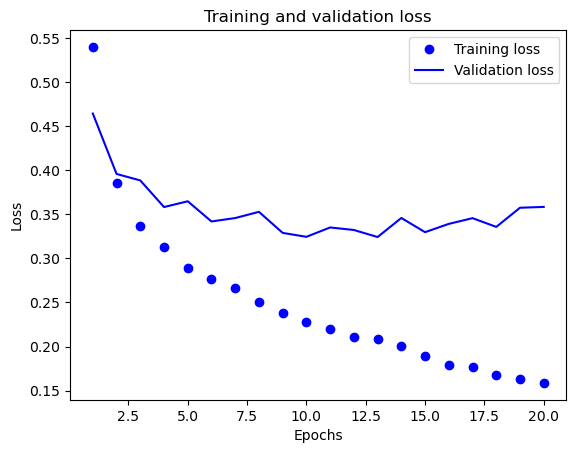

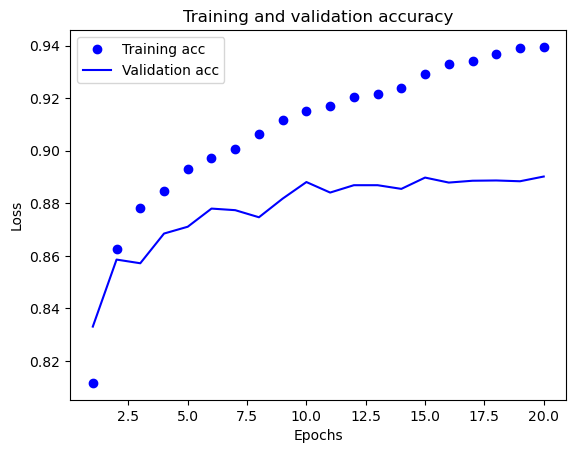

In [224]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

313/313 [==============================] - 0s 894us/step


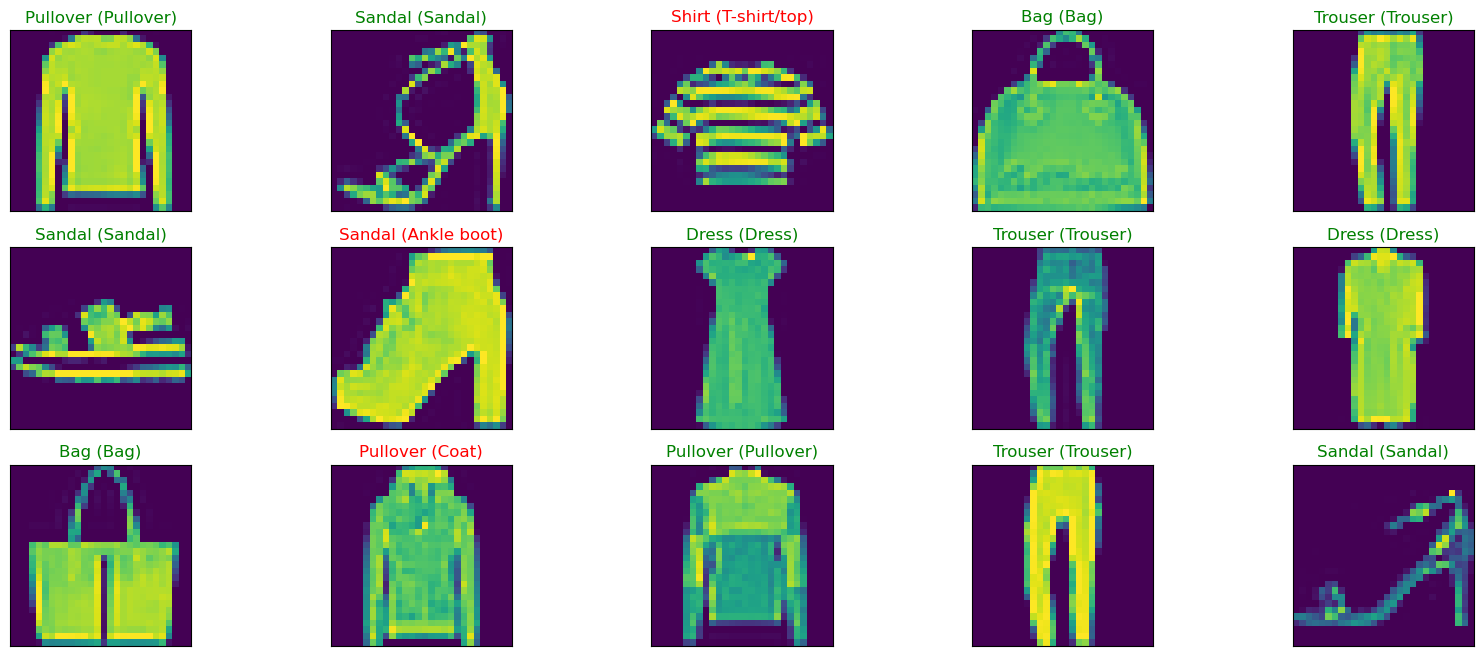

In [294]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

y_hat = model.predict(test_data)
X_test = test_data.reshape(10000, 28, 28)
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(test_data.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(test_data[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = test_labels[index]
    ax.set_title("{} ({})".format(class_names[predict_index],
                                  class_names[true_index]),
                                  color=("green" if predict_index == true_index else "red"))